<a href="https://colab.research.google.com/github/roheelislam/Cat-Dog-Classifier-Model/blob/main/Cat_Dog_Classifier_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.5401 - loss: 0.6821 - val_accuracy: 0.6410 - val_loss: 0.6346
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.6613 - loss: 0.6139 - val_accuracy: 0.7080 - val_loss: 0.5622
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.7113 - loss: 0.5627 - val_accuracy: 0.7265 - val_loss: 0.5373
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7357 - loss: 0.5255 - val_accuracy: 0.7375 - val_loss: 0.5180
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7554 - loss: 0.4969 - val_accuracy: 0.7440 - val_loss: 0.5077
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7705 - loss: 0.4722 - val_accuracy: 0.7540 - val_loss: 0.4991
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8011 - loss: 0.4325 - val_accuracy: 0.7525 - val_loss: 0.5023
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.8196 - loss: 0.4003 - 

Saving 12499.jpg to 12499 (4).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


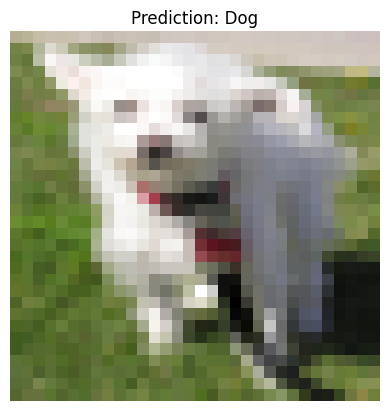


Prediction Details:
 - Uploaded File: 12499 (4).jpg
 - Model Prediction: Dog
 - Confidence Score: 0.99
 - Prediction Rating: High Confidence

Model Insights:
 - The model was trained on a dataset containing cats and dogs.
 - Training Accuracy: 0.85
 - Validation Accuracy: 0.75

FYI:
 - Confidence scores closer to 1 or 0 indicate higher certainty in the prediction.
 - Scores around 0.5 may indicate that the model is unsure.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from google.colab import files
from PIL import Image

# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Filter dataset to include only cats (class 3) and dogs (class 5)
cat_dog_indices_train = np.where((y_train == 3) | (y_train == 5))[0]
cat_dog_indices_test = np.where((y_test == 3) | (y_test == 5))[0]

x_train, y_train = x_train[cat_dog_indices_train], y_train[cat_dog_indices_train]
x_test, y_test = x_test[cat_dog_indices_test], y_test[cat_dog_indices_test]

# Convert labels: 3 -> 0 (cat), 5 -> 1 (dog)
y_train = np.where(y_train == 3, 0, 1)
y_test = np.where(y_test == 3, 0, 1)

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 2: Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 3: Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Display training performance
print("\nTraining Summary:")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.2f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.2f}")
print(f"Training Loss: {history.history['loss'][-1]:.2f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.2f}\n")

# Step 4: Upload and classify custom image
def predict_image():
    print("Upload an image file to classify it as a Cat or Dog.")
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Open and preprocess the image
        img = Image.open(filename).resize((32, 32))
        img_array = np.array(img) / 255.0  # Normalize image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        # Predict
        prediction = model.predict(img_array)
        confidence = prediction[0][0]
        class_name = 'Dog' if confidence > 0.5 else 'Cat'

        # Display image and prediction
        plt.imshow(img)
        plt.title(f'Prediction: {class_name}')
        plt.axis('off')
        plt.show()

        # Prediction rating based on confidence
        if confidence > 0.9 or confidence < 0.1:
            rating = "High Confidence"
        elif 0.7 < confidence <= 0.9 or 0.1 <= confidence <= 0.3:
            rating = "Moderate Confidence"
        else:
            rating = "Low Confidence"

        # Display detailed output
        print(f"\nPrediction Details:")
        print(f" - Uploaded File: {filename}")
        print(f" - Model Prediction: {class_name}")
        print(f" - Confidence Score: {confidence:.2f}")
        print(f" - Prediction Rating: {rating}")
        print(f"\nModel Insights:")
        print(f" - The model was trained on a dataset containing cats and dogs.")
        print(f" - Training Accuracy: {history.history['accuracy'][-1]:.2f}")
        print(f" - Validation Accuracy: {history.history['val_accuracy'][-1]:.2f}")
        print(f"\nFYI:")
        print(" - Confidence scores closer to 1 or 0 indicate higher certainty in the prediction.")
        print(" - Scores around 0.5 may indicate that the model is unsure.")

# Call the function to upload and predict
predict_image()
